# Import libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Read data

In [93]:
connections = pd.read_csv('data/081/connections.csv', on_bad_lines='warn', delimiter='\t')
devices = pd.read_csv('data/081/devices.csv', on_bad_lines='warn', delimiter='\t')
processes = pd.read_csv('data/081/processes.csv', on_bad_lines='warn', delimiter='\t')
profiles = pd.read_csv('data/081/profiles.csv', on_bad_lines='warn', delimiter='\t')

# 1.1.A


## Opis dát

In [94]:
connections.head()

,ts,imei,mwra,c.android.youtube,c.android.chrome,c.android.gm,c.dogalize,c.katana,c.UCMobile.x86,c.updateassist,c.android.vending,c.UCMobile.intl,c.raider
0,2018-05-05 10:00:00,8630330696303482162,0.0,13.42668,15.66393,11.65566,10.64494,10.08955,70.03983,48.23639,64.64275,81.97591,7.36220
1,2018-05-05 10:01:00,8630330696303481370,0.0,11.45362,10.75380,9.79337,17.14804,15.31063,55.17141,48.61060,49.60841,38.25160,56.58256
2,2018-05-05 10:02:00,3590433799317661941,1.0,16.33410,7.54294,7.33426,12.91862,17.03970,44.36041,57.53637,17.15762,93.66474,47.72499
3,2018-05-05 10:03:00,3590433799317661370,1.0,12.27418,12.72129,11.98519,8.49009,12.40497,49.59519,50.91479,86.52847,3.66828,15.77725
4,2018-05-05 10:04:00,3590433799317661628,0.0,10.96774,11.00387,12.92665,15.85612,10.30359,20.78323,44.93539,41.46109,45.39833,11.02030


In [95]:
connections.info()
connections.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15162 entries, 0 to 15161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15162 non-null  object 
 1   imei               15162 non-null  int64  
 2   mwra               15162 non-null  float64
 3   c.android.youtube  15162 non-null  float64
 4   c.android.chrome   15162 non-null  float64
 5   c.android.gm       15162 non-null  float64
 6   c.dogalize         15162 non-null  float64
 7   c.katana           15162 non-null  float64
 8   c.UCMobile.x86     15162 non-null  float64
 9   c.updateassist     15162 non-null  float64
 10  c.android.vending  15162 non-null  float64
 11  c.UCMobile.intl    15162 non-null  float64
 12  c.raider           15162 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,imei,mwra,c.android.youtube,c.android.chrome,c.android.gm,c.dogalize,c.katana,c.UCMobile.x86,c.updateassist,c.android.vending,c.UCMobile.intl,c.raider
count,1.516200e+04,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000
mean,3.923871e+18,0.626698,13.119660,11.947438,11.949905,12.500060,12.484151,50.323781,52.536704,49.469003,50.004304,49.727124
std,3.321549e+18,0.483697,2.605412,2.652434,2.614210,2.637516,2.565811,13.268816,13.034044,28.937254,28.838077,28.698003
min,3.590434e+17,0.000000,4.135800,2.456990,2.399800,2.748560,4.419040,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,11.383815,10.032775,10.093725,10.633720,10.548925,41.401637,43.777812,24.488428,24.978685,25.345785
50%,3.590434e+18,1.000000,13.321610,11.889335,11.886435,12.647560,12.318145,50.090725,52.525540,49.248720,50.390130,49.815600
75%,8.630331e+18,1.000000,14.969463,13.854020,13.824647,14.435635,14.352718,59.297940,61.456370,74.709677,74.982998,74.046170
max,8.630331e+18,1.000000,22.880240,21.208900,22.046630,21.451520,21.651550,100.000000,100.000000,100.000000,100.000000,100.000000


Môžeme pozorovať, že v tabuľke connections sa nenachádzajú žiadne nedefinované hodnoty. Tabuľka má 15162 riadkov. Celkovo je tabuľka zložená z 1 stĺpca objekov, ktoré reprezentujú timestamp, 10 spojitých atribútov s dátovým typom float64 a 1 kategorický atribút int64, ktorý reprezentuje identifikátor a 1 kategorický atribút float64, ktorý reprezentuje infikovanosť. Taktiež vidíme, že 63% záznamov bolo napadnutých malware-om.

In [96]:
devices.head()

,latitude,longitude,store_name,code,location,imei
0,50.75767,-1.54430,Lymington,GB,Europe/London,3590433799317661636
1,53.95278,32.86389,Roslavl‚Äô,RU,Europe/Moscow,359043379931766130
2,20.74122,-100.44843,Santa Rosa Jauregui,MX,America/Mexico_City,8630330696303482261
3,54.58048,16.86194,Ustka,PL,Europe/Warsaw,8630330696303481164
4,14.37395,100.48528,Bang Ban,TH,Asia/Bangkok,359043379931766262


In [97]:
devices.info()
devices.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2982 non-null   float64
 1   longitude   2982 non-null   float64
 2   store_name  2982 non-null   object 
 3   code        2980 non-null   object 
 4   location    2982 non-null   object 
 5   imei        2982 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 139.9+ KB


,latitude,longitude,imei
count,2982.000000,2982.000000,2.982000e+03
mean,28.858931,13.226179,3.821491e+18
std,23.364133,72.452759,3.275767e+18
min,-44.396720,-156.474320,3.590434e+17
25%,14.505377,-50.006390,8.630331e+17
50%,36.533330,10.580820,3.590434e+18
75%,45.790505,73.079458,8.630331e+18
max,68.798330,178.004170,8.630331e+18


Tabuľka devices obsahuje 2 záznamy s nedefinovanou hodnotou v stĺpci code. Ďalej pozorujeme, že tabuľka obsahuje len 2 spojité atribúty a 2 kategorické, keď nerátame s identifikátorom. Vidíme, že dáta su zozbierané roztrúsené z viaceych častí sveta, čo nám dokazuje priemer atribútov [lattitude, longitude], ktorý sa blíži k hodnote [0, 0]

In [98]:
processes.head()

,ts,imei,mwra,p.android.packageinstaller,p.android.documentsui,p.system,p.android.externalstorage,p.android.chrome,p.android.settings,p.android.gm,...,p.notifier,p.katana,p.google,p.android.defcontainer,p.simulator,p.android.gms,p.dogalize,p.gms.persistent,p.browser.provider,p.olauncher
0,2018-05-05 10:00:00,8630330696303482162,0.0,15.88869,10.05795,13.35182,11.49810,11.32636,15.26689,13.90930,...,13.08851,20.09143,82.79608,66.64918,34.95928,83.11314,80.79682,21.05406,57.70783,62.72112
1,2018-05-05 10:01:00,8630330696303481370,0.0,8.59717,10.84683,11.02006,10.21514,10.77112,17.05934,14.49830,...,57.82027,82.73715,2.96508,47.76478,67.03415,75.16736,76.36189,88.33102,61.47245,75.35502
2,2018-05-05 10:02:00,3590433799317661941,1.0,11.63475,13.83435,12.42586,15.64822,12.59035,15.08535,13.79256,...,49.83197,3.40068,74.76720,88.20151,27.44695,50.96700,26.92772,96.30272,50.45846,96.49968
3,2018-05-05 10:03:00,3590433799317661370,1.0,9.72483,11.01749,14.47931,16.53736,11.39341,15.09234,17.66187,...,73.80461,84.15959,11.84456,87.18456,88.42178,47.68328,2.08008,48.94879,25.98894,56.23937
4,2018-05-05 10:04:00,3590433799317661628,0.0,11.90430,10.98283,13.36029,15.41702,18.59375,13.91144,13.34290,...,39.66409,78.46198,75.06329,23.80547,19.83619,46.47065,93.48875,44.13500,60.44037,47.82343


In [99]:
processes.info()
processes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15162 entries, 0 to 15161
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15162 non-null  object 
 1   imei                        15162 non-null  int64  
 2   mwra                        15162 non-null  float64
 3   p.android.packageinstaller  15162 non-null  float64
 4   p.android.documentsui       15162 non-null  float64
 5   p.system                    15162 non-null  float64
 6   p.android.externalstorage   15162 non-null  float64
 7   p.android.chrome            15162 non-null  float64
 8   p.android.settings          15162 non-null  float64
 9   p.android.gm                15162 non-null  float64
 10  p.inputmethod.latin         15162 non-null  float64
 11  p.android.vending           15162 non-null  float64
 12  p.process.gapps             15162 non-null  float64
 13  p.notifier                  151

,imei,mwra,p.android.packageinstaller,p.android.documentsui,p.system,p.android.externalstorage,p.android.chrome,p.android.settings,p.android.gm,p.inputmethod.latin,...,p.notifier,p.katana,p.google,p.android.defcontainer,p.simulator,p.android.gms,p.dogalize,p.gms.persistent,p.browser.provider,p.olauncher
count,1.516200e+04,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,...,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000
mean,3.923871e+18,0.626698,11.326046,11.848870,13.670559,13.055184,11.881308,14.310053,13.132933,54.037651,...,47.207102,49.681392,49.686647,50.041205,50.289712,50.226288,49.865521,49.877674,49.605885,49.839759
std,3.321549e+18,0.483697,2.209583,2.738104,2.277519,2.675060,2.559545,1.803823,2.624266,13.564650,...,12.849429,28.975010,28.915917,28.941554,28.824253,28.779530,29.036963,28.949208,29.052083,28.868849
min,3.590434e+17,0.000000,3.110500,0.000000,4.550230,2.936650,2.360010,6.172530,3.716390,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,9.853388,9.965942,12.253902,11.168423,10.094302,13.155487,11.415978,44.749185,...,38.623005,24.690973,24.440675,24.915435,25.271123,25.606243,24.552067,24.592910,24.234525,24.769848
50%,3.590434e+18,1.000000,11.099845,11.601655,13.846610,13.135550,11.631625,14.318000,13.358530,54.129555,...,47.214555,49.279675,49.627770,50.379485,50.065190,50.386350,49.941625,49.563415,50.072235,49.543865
75%,8.630331e+18,1.000000,12.556738,13.592090,15.252290,14.970375,13.631315,15.469337,14.982325,63.305960,...,55.891710,74.871792,74.791145,74.941405,75.358277,75.183132,75.389985,75.026663,74.791150,74.949430
max,8.630331e+18,1.000000,22.084980,23.338080,22.717330,21.937050,20.892390,22.418190,22.254860,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Vidíme, že tabuľka processes neobsahuje žiadne nedefinované záznamy. Ďalej môžeme sledovať, že priemer a štandardná odchylka infikovanosti zariadení sa zhoduje s priemerom a štandardnou odchylkou v tabuľke connections. Sledujeme, že tabuľka obsahuje 2 kategorické atribúty mwra a imei a 21 spojitých atribútov. 

In [100]:
profiles.head()

,name,ssn,birthdate,company,current_location,imei,user_id,address,username,registration,mail,job
0,Adam Buckley,256-10-3282,NaN,Thompson PLC,"(Decimal('-27.796214'), Decimal('35.724897'))",8630330696303481321,261,"2356 Kelly Stravenue\nNorth Nicholechester, WV...",brandyvaughn,"11/03/2019, 00:00:00",brooksmelinda@hotmail.com,"Engineer, maintenance"
1,William Mccall,836-85-9036,NaN,"Brewer, Jones and Simpson",NaN,359043379931766197,1432,"83245 Jack Port Suite 186\nHeathermouth, MP 26449",daniel34,07 May 2023,michellehaley@gmail.com,NaN
2,Tabitha Silva,316-02-7078,2013-01-13,James Group,"(Decimal('75.6463495'), Decimal('-101.730814'))",3590433799317661321,340,"6584 Jody Flat\nMichaelport, DC 53671",ashley60,"03/16/2019, 00:00:00",xmartinez@yahoo.com,NaN
3,Diane Perez,207-68-5498,1944-07-28,"Warren, Frank and Cox","(Decimal('-78.0240235'), Decimal('-40.012949'))",8630330696303481362,447,"6554 Fox Haven\nStokesstad, IA 11756",richardhoward,"04/07/2018, 00:00:00",fischerlindsey@gmail.com,NaN
4,Mrs. Sharon Villegas,389-65-1005,NaN,Green-Richardson,"(Decimal('62.4863645'), Decimal('112.231295'))",8630330696303482287,1342,"67336 Peter Rue\nKathyland, AK 30553",mcbrideshaun,2022/05/21,gilbertwilliam@yahoo.com,NaN


In [101]:
profiles.info()
profiles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2518 non-null   object
 1   ssn               2518 non-null   object
 2   birthdate         1385 non-null   object
 3   company           2518 non-null   object
 4   current_location  2392 non-null   object
 5   imei              2518 non-null   int64 
 6   user_id           2518 non-null   int64 
 7   address           2140 non-null   object
 8   username          2518 non-null   object
 9   registration      2518 non-null   object
 10  mail              2518 non-null   object
 11  job               755 non-null    object
dtypes: int64(2), object(10)
memory usage: 236.2+ KB


,imei,user_id
count,2.518000e+03,2518.000000
mean,3.805736e+18,1255.986100
std,3.317665e+18,725.617082
min,3.590434e+17,0.000000
25%,8.630331e+17,629.000000
50%,3.590434e+18,1247.000000
75%,8.630331e+18,1881.500000
max,8.630331e+18,2517.000000


Sledujeme, že je v tabuľke profiles veľa hodnôt nedefinovaných. Ako príkladom môže slúžiť atribút job, ktorý má hodnotu len v 755 záznamoch z celkových 2518 záznamov. Takéto atribúty nemá cenu brať do úvahy, a preto ich neskôr odstránime. Zas atribút current location väčšinu hodnôt má, tak zvyšné si dodefinujeme. Celkovo má tabuľka 3 spojité atribúty, t.j. current_location, birthdate a registration, a 9 kategorických.

## Počet riadkov a atribútov

In [102]:
print('connections:' + str(connections.shape))
print('devices:' + str(devices.shape))
print('processes:' + str(processes.shape))
print('profiles:' + str(profiles.shape))

connections:(15162, 13)
devices:(2982, 6)
processes:(15162, 23)
profiles:(2518, 12)


# Null values

In [103]:
connections[connections.isnull().any(axis=1)]

,ts,imei,mwra,c.android.youtube,c.android.chrome,c.android.gm,c.dogalize,c.katana,c.UCMobile.x86,c.updateassist,c.android.vending,c.UCMobile.intl,c.raider


In [104]:
devices[devices.isnull().any(axis=1)]

,latitude,longitude,store_name,code,location,imei
1829,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,863033069630348545
2850,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,3590433799317661016


Vidíme, že tabuľka devices má len 2 nedefinované hodnoty, a to v atribúte code, ktorý reprezentuje kód krajiny. Ten ale vieme jednoducho doplniť vďaka informácii z atribútu location.

In [105]:
processes[processes.isnull().any(axis=1)]

,ts,imei,mwra,p.android.packageinstaller,p.android.documentsui,p.system,p.android.externalstorage,p.android.chrome,p.android.settings,p.android.gm,...,p.notifier,p.katana,p.google,p.android.defcontainer,p.simulator,p.android.gms,p.dogalize,p.gms.persistent,p.browser.provider,p.olauncher


In [106]:
profiles[profiles.isnull().any(axis=1)]

,name,ssn,birthdate,company,current_location,imei,user_id,address,username,registration,mail,job
0,Adam Buckley,256-10-3282,NaN,Thompson PLC,"(Decimal('-27.796214'), Decimal('35.724897'))",8630330696303481321,261,"2356 Kelly Stravenue\nNorth Nicholechester, WV...",brandyvaughn,"11/03/2019, 00:00:00",brooksmelinda@hotmail.com,"Engineer, maintenance"
1,William Mccall,836-85-9036,NaN,"Brewer, Jones and Simpson",NaN,359043379931766197,1432,"83245 Jack Port Suite 186\nHeathermouth, MP 26449",daniel34,07 May 2023,michellehaley@gmail.com,NaN
2,Tabitha Silva,316-02-7078,2013-01-13,James Group,"(Decimal('75.6463495'), Decimal('-101.730814'))",3590433799317661321,340,"6584 Jody Flat\nMichaelport, DC 53671",ashley60,"03/16/2019, 00:00:00",xmartinez@yahoo.com,NaN
3,Diane Perez,207-68-5498,1944-07-28,"Warren, Frank and Cox","(Decimal('-78.0240235'), Decimal('-40.012949'))",8630330696303481362,447,"6554 Fox Haven\nStokesstad, IA 11756",richardhoward,"04/07/2018, 00:00:00",fischerlindsey@gmail.com,NaN
4,Mrs. Sharon Villegas,389-65-1005,NaN,Green-Richardson,"(Decimal('62.4863645'), Decimal('112.231295'))",8630330696303482287,1342,"67336 Peter Rue\nKathyland, AK 30553",mcbrideshaun,2022/05/21,gilbertwilliam@yahoo.com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2511,Anthony Charles,575-56-3211,1942-01-26,"Franklin, Palmer and Burns","(Decimal('-13.512617'), Decimal('112.161223'))",3590433799317662188,195,"87681 Donald Stream Apt. 859\nPort Stephen, DE...",hholland,2018/08/10,fcalderon@hotmail.com,NaN
2512,Jessica Vargas,200-19-0810,NaN,Meyer-Hines,"(Decimal('35.0437145'), Decimal('65.906809'))",3590433799317661222,2153,"2953 Paul Station\nCalhounborough, MI 41391",travis21,18 Jan 2023,kirkwilliam@hotmail.com,NaN
2513,Jennifer Walker,777-48-0523,1988-08-24,"Baldwin, Sweeney and Campbell","(Decimal('46.5649145'), Decimal('-19.471836'))",8630330696303481636,1283,"482 Ashley Heights Suite 415\nHamiltonport, OH...",randalljohn,2019/07/27,emckee@hotmail.com,NaN
2515,Antonio Wilson,471-27-0192,1911-06-13,Torres and Sons,"(Decimal('-58.5421945'), Decimal('92.471667'))",3590433799317661560,947,"3259 Shelia Locks\nRobertstad, IN 31032",hughestravis,"02/29/2020, 00:00:00",xrodriguez@gmail.com,NaN


Vidíme, že tabuľka profiles obsahuje mnoho riadkov s nedefinovanými hodnotami v rôznych atribútoch. Konkrétnemu riešeniu sa budeme venovať neskôr.

# 1.1.B

## Výber atribútov

Ďalšia časť sa týka analýzy významných atribútov. Keďže o danom datasete ešte nepoznáme veľa informácií, ktoré by sme mohli považovať ako za dôležité, tak sa budeme orientovať hlavne na základe sémantických významov daných atribútov a taktiež ďalších, menších faktorov, t. j. typ (či sú kvalitatívne alebo kvantitatívne).

## connections

Táto tabuľka obsahuje atribúty, ktoré prevažne popisujú používanie (množstvo alebo čas) aplikácií na daných zariadeniach. Niektoré atribúty sú hneď známe a padnú do oka (napr. youtube, chrome), ale niektoré vyžadovali dodatočné vyhľadávanie informácií (t. j. katana je codename pre facebook, gm znamená gmail, atď.). Vzhľadom na popularitu jednotlivých aplikácií som sa rozhodol z tejto tabuľky zobrať nasledovných 5 atribútov: c.android.youtube, c.android.chrome, c.android.gm, c.katana a c.android.vending (Google App playstore).

### c.android.youtube

#### Distribúcia

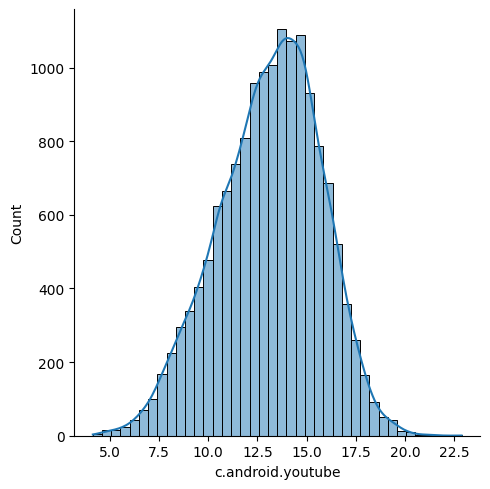

In [107]:
sns.displot(connections["c.android.youtube"], bins=40, kde=True)

Môžeme vidieť, že dané dáta inklinujú k normálnej distribúcii.

#### Priemer

In [108]:
np.mean(connections["c.android.youtube"])

np.float64(13.119659893153939)

#### Medián

In [109]:
np.median(connections["c.android.youtube"])

np.float64(13.32161)

#### Módus

In [110]:
stats.mode(connections["c.android.youtube"])

ModeResult(mode=np.float64(9.74103), count=np.int64(3))

### c.android.chrome

#### Distribúcia

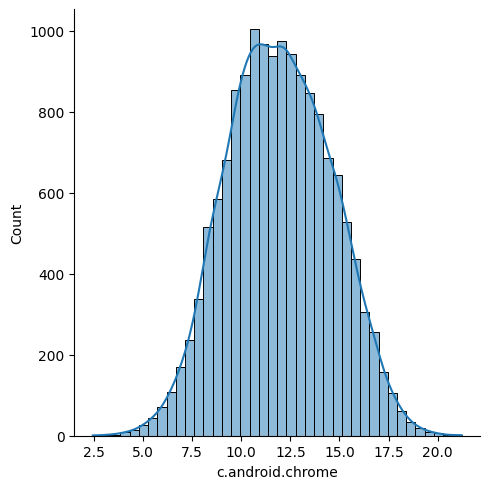

In [111]:
sns.displot(connections["c.android.chrome"], bins=40, kde=True)

Hodnoty tejto premennej tiež podliehajú normálnej distribúcii.

#### Priemer

In [112]:
np.mean(connections["c.android.chrome"])

np.float64(11.947437883524602)

#### Medián

In [113]:
np.median(connections["c.android.chrome"])

np.float64(11.889334999999999)

#### Módus

In [114]:
stats.mode(connections["c.android.chrome"])

ModeResult(mode=np.float64(12.3732), count=np.int64(3))

### c.android.gm

#### Distribúcia

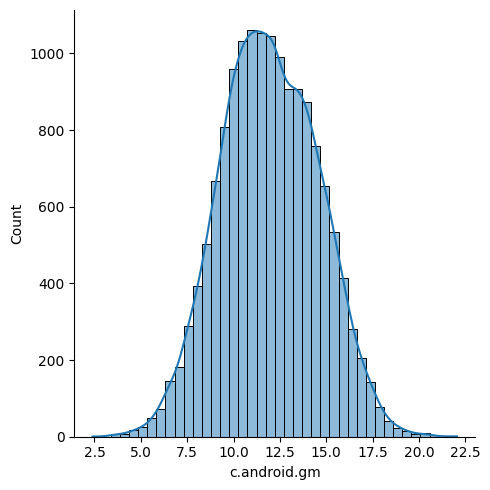

In [115]:
sns.displot(connections["c.android.gm"], bins=40, kde=True)

Hodnoty tejto premennej tiež podliehajú normálnej distribúcii, avšak s minimálnym right-skewom.

#### Priemer

In [116]:
np.mean(connections["c.android.gm"])

np.float64(11.949904859517213)

#### Medián

In [117]:
np.median(connections["c.android.gm"])

np.float64(11.886434999999999)

#### Módus

In [118]:
stats.mode(connections["c.android.gm"])

ModeResult(mode=np.float64(8.86941), count=np.int64(3))

### c.android.vending

#### Distribúcia

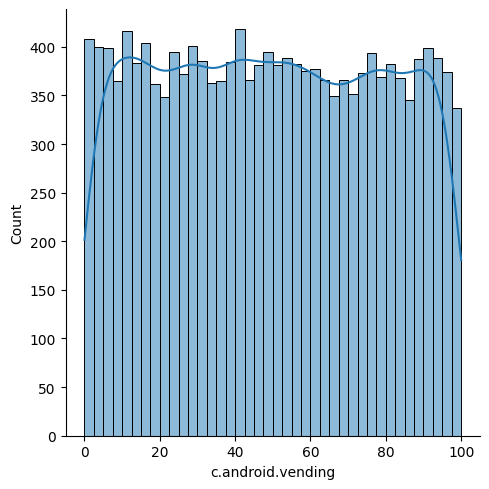

In [119]:
sns.displot(connections["c.android.vending"], bins=40, kde=True)

Tieto dáta narozdiel od predošlých podliehajú uniformnej distribúcii.

#### Priemer

In [120]:
np.mean(connections["c.android.vending"])

np.float64(49.469002548476446)

#### Medián

In [121]:
np.median(connections["c.android.vending"])

np.float64(49.24872)

#### Módus

In [122]:
stats.mode(connections["c.android.vending"])

ModeResult(mode=np.float64(49.66763), count=np.int64(3))

### c.katana

#### Distribúcia

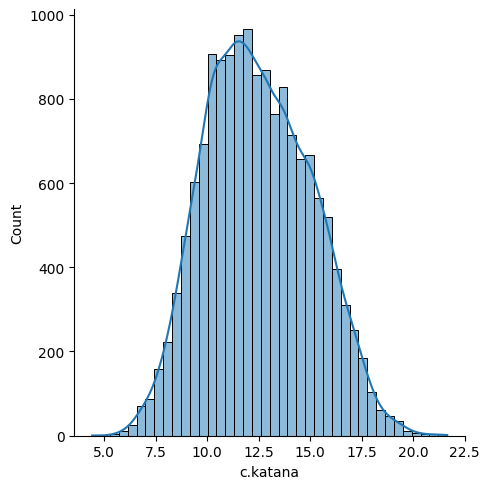

In [123]:
sns.displot(connections["c.katana"], bins=40, kde=True)

Dané hodnoty znova podliehajú normálnej distribúcii s minimálnym right-skewom.

#### Priemer

In [124]:
np.mean(connections["c.katana"])

np.float64(12.484150555335708)

#### Medián

In [125]:
np.median(connections["c.katana"])

np.float64(12.318145000000001)

#### Módus

In [126]:
stats.mode(connections["c.katana"])

ModeResult(mode=np.float64(10.62304), count=np.int64(3))

### Boxploty daných atribútov

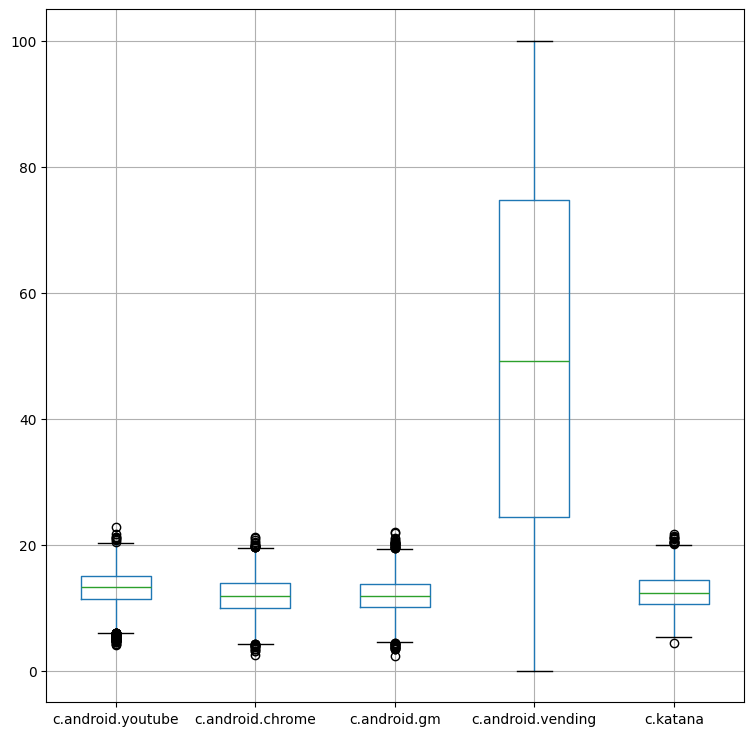

In [156]:
selected_connections_columns = ['c.android.youtube', 'c.android.chrome', 'c.android.gm', 'c.android.vending', 'c.katana']

plt.figure(figsize=(9, 9)) 
connections[selected_connections_columns].boxplot()
plt.show()

## devices

Len niektoré atribúty z tejto tabuľky sú kvantitatívne, a to konkrétne imei (International Mobile Equipment Identity, t.j. unikátny identifikátor mobilného zariadenia) a následne zemepisná dĺžka a šírka. Keďže identifikátor nie je možné zmysluplne štatisticky analyzovať a nevidím zatiaľ súvis medzi zemepisnou šírkou a dĺžkou zakúpenia zariadenia a počtu zariadení infikovaných malwarom, považujem analýzu týchto atribútov za bezvýznamnú.

## processes

Táto tabuľka obsahuje niektoré atribúty, ktoré pravdepodobne korelujú s niektorými inými zo súboru connections, no niektoré sú unikátne pre tento súbor, ako napríklad p.android.packageinstaller, p.system, p.android.settings, p.process.gapps a p.olauncher. Na základe predpokladaných významov týchto názvov som sa rozhodol analyzovať tieto atribúty.

### p.android.packageinstaller

#### Distribúcia

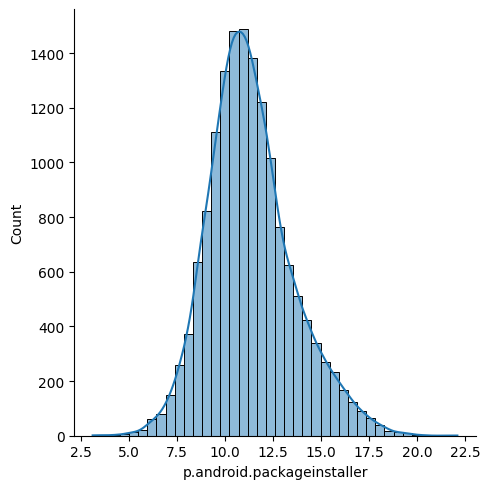

In [128]:
sns.displot(processes["p.android.packageinstaller"], bins=40, kde=True)

Môžeme vidieť, že dané dáta inklinujú k normálnej distribúcii s malým right-skewom.

#### Priemer

In [129]:
np.mean(processes["p.android.packageinstaller"])

np.float64(11.326046034164357)

#### Medián

In [130]:
np.median(processes["p.android.packageinstaller"])

np.float64(11.099845)

#### Módus

In [131]:
stats.mode(processes["p.android.packageinstaller"])

ModeResult(mode=np.float64(9.76992), count=np.int64(3))

### p.system

#### Distribúcia

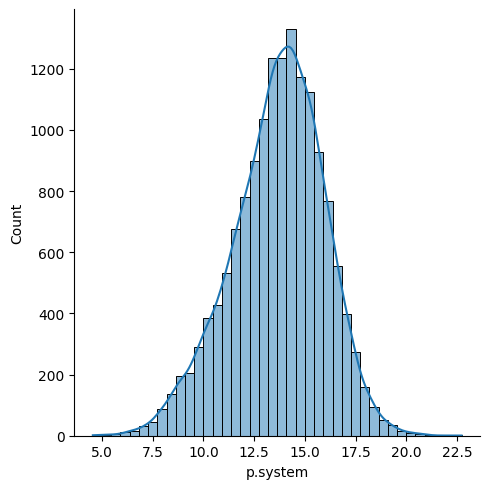

In [133]:
sns.displot(processes["p.system"], bins=40, kde=True)

Môžeme vidieť, že dané dáta inklinujú k normálnej distribúcii, no tento raz s jemným left-skewom.

#### Priemer

In [134]:
np.mean(processes["p.system"])

np.float64(13.670558597150773)

#### Medián

In [135]:
np.median(processes["p.system"])

np.float64(13.84661)

#### Módus

In [136]:
stats.mode(processes["p.system"])

ModeResult(mode=np.float64(12.98587), count=np.int64(3))

### p.android.settings

#### Distribúcia

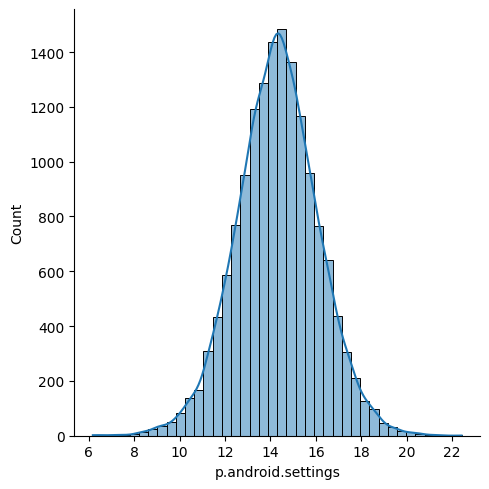

In [141]:
sns.displot(processes["p.android.settings"], bins=40, kde=True)

Tieto hodnoty tiež predstavujú normálnu distribúciu.

#### Priemer

In [142]:
np.mean(processes["p.android.settings"])

np.float64(14.310053117003035)

#### Medián

In [143]:
np.median(processes["p.android.settings"])

np.float64(14.318)

#### Módus

In [144]:
stats.mode(processes["p.android.settings"])

ModeResult(mode=np.float64(13.07896), count=np.int64(3))

### p.process.gapps

#### Distribúcia

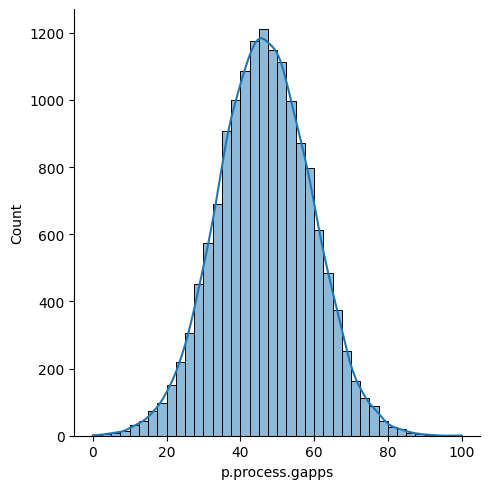

In [159]:
sns.displot(processes["p.process.gapps"], bins=40, kde=True)

Tieto hodnoty tiež predstavujú normálnu distribúciu.

#### Priemer

In [160]:
np.mean(processes["p.process.gapps"])

np.float64(46.60420038451392)

#### Medián

In [161]:
np.median(processes["p.process.gapps"])

np.float64(46.510845)

#### Módus

In [162]:
stats.mode(processes["p.process.gapps"])

ModeResult(mode=np.float64(32.27951), count=np.int64(3))

### p.olauncher

#### Distribúcia

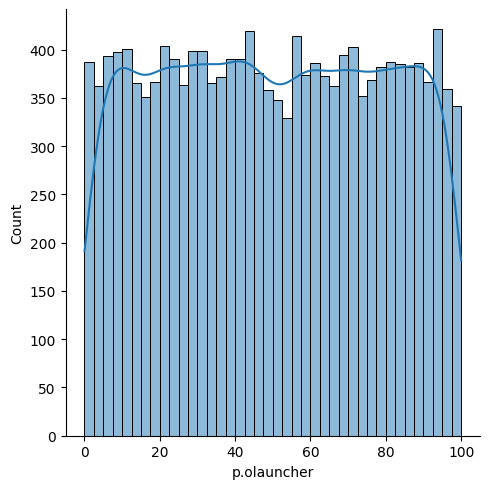

In [152]:
sns.displot(processes["p.olauncher"], bins=40, kde=True)

Tieto hodnoty sa už správajú inak, reprezentujú uniformnú distribúciu

#### Priemer

In [153]:
np.mean(processes["p.olauncher"])

np.float64(49.83975937870993)

#### Medián

In [154]:
np.median(processes["p.olauncher"])

np.float64(49.543865)

#### Módus

In [155]:
stats.mode(processes["p.olauncher"])

ModeResult(mode=np.float64(3.46608), count=np.int64(3))

### Boxploty daných atribútov

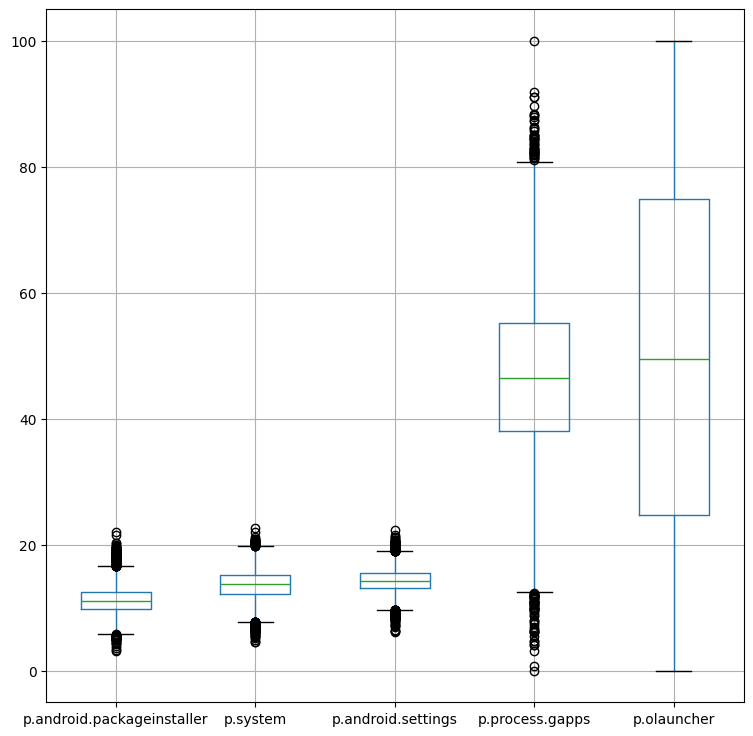

In [158]:
selected_processes_columns = ['p.android.packageinstaller', 'p.system', 'p.android.settings', 'p.process.gapps', 'p.olauncher']

plt.figure(figsize=(9, 9)) 
processes[selected_processes_columns].boxplot()
plt.show()

Môžeme vyčítať, že p.process.gapps a p.olauncher majú výrazne vyššie mediány ako ostatné atribúty, a taktiež že ich p.process.gapps obsahuje outliery vzdialené ďaleko od whiskers.

## profiles

Keďže tento súbor obsahuje skoro výlučne kvalitatívne atribúty, nemá ich význam analyzovať. Výnimkou by mohol byť atribút birthdate, ktorý by mohol súvisieť s predikovanou premennou vzhľadom na vek používateľov a množstvo zariadení s nainštalovaným malwarom, ale nateraz ho vynechám, keďže nám samotný dátum narodenia nič nepovie.

# 1.1.C